# <div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone: Preprocessing and EDA for Train Set </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Name: Ali Razi**

**Contact: ali.razi9292@gmail.com**

**Date: 08-09-2023**

---

**Main Objective** Using machine learning estimate size of tumors in breast cancer patients to provide the practitioners and patients better vision of their cancers stages.

In this notebook it is aimed to focus on preprocessing and EDA for train set. After having perspective of data frame, in this notebook we can run certain steps of cleanign data and scaling of it.


# Notebook Content 


- Geneal Information of Train Set 
- EDA
     - Modifying duplicated data
     - Encoding Categorical varaibles
     - Checking randomness of classes in the set
     - Resize
     - Agument
     - Denoised
     - Blanaced
     - Converting to numppy array




In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
import os
import pathlib
import random
import cv2


# Basic information about Train Set  

- Definning a variable named path_train that holds the file path to a directory containing training data:

In [5]:
# Define the path to the training data directory
path_train = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train"

# Create a Path object using pathlib to represent the training data directory
data_train_dir = pathlib.Path(path_train)

- Retrieving and sorting the names of subdirectories within the directory:

In [6]:
# Retrieve a list of subdirectories within the training data directory
class_names = np.array(sorted([item.name for item in data_train_dir.glob("*")]))
class_names

array(['.DS_Store', 'augmented_benign', 'augmented_malignant', 'balanced',
       'benign', 'denoised_benign', 'denoised_malignant', 'malignant',
       'resized_benign', 'resized_malignant'], dtype='<U19')

>Lists different categories related to the task, including original and augmented images of benign and malignant cases, as well as denoised and resized versions. The array helps label and organize data, enabling effective training of a classification model.

----

- Calculates the total height (number of rows) of images with specific file extensions in the directory:

In [7]:
# Count total rows

from PIL import Image
import os

def count_rows(directory, file_extensions):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(file_extensions)]
    total_rows = 0

    for image_path in image_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            total_rows += height

    return total_rows

directory_benign = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign"
directory_malignant = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant"
file_extensions = (".png", ".jpg") 


rows_benign = count_rows(directory_benign, file_extensions)
rows_malignant = count_rows(directory_malignant, file_extensions)


print("Benign Images:")
print(f"Total Rows: {rows_benign}")

print("\nMalignant Images:")
print(f"Total Rows: {rows_malignant}")


Benign Images:
Total Rows: 892506

Malignant Images:
Total Rows: 880224


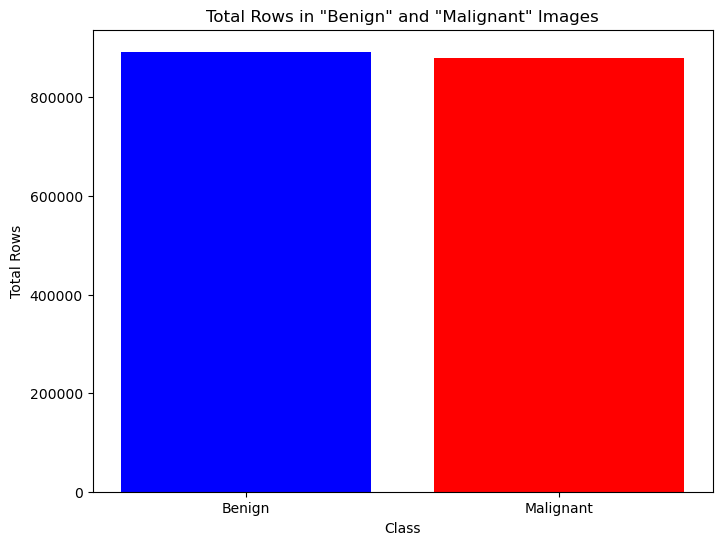

In [8]:
# Create a bar chart

import matplotlib.pyplot as plt

total_rows_benign = 892506
total_rows_malignant = 880224

class_names = ["Benign", "Malignant"]

total_rows = [total_rows_benign, total_rows_malignant]


plt.figure(figsize=(8, 6))
plt.bar(class_names, total_rows, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Total Rows')
plt.title('Total Rows in "Benign" and "Malignant" Images')
plt.show()


- Computes the percentage of benign and malignant images:

In [9]:
# Calculate the percentage 

import os

def count_images_in_folder(folder_path):
    num_images = 0
    for image_file in os.listdir(folder_path):
        if image_file.endswith((".png", ".jpg")):
            num_images += 1
    return num_images

benign_folder = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign"
malignant_folder = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant"

total_benign_images = count_images_in_folder(benign_folder)
total_malignant_images = count_images_in_folder(malignant_folder)

total_images = total_benign_images + total_malignant_images


percent_benign = (total_benign_images / total_images) * 100
percent_malignant = (total_malignant_images / total_images) * 100

print("Percentage of benign images: {:.2f}%".format(percent_benign))
print("Percentage of malignant images: {:.2f}%".format(percent_malignant))


Percentage of benign images: 50.34%
Percentage of malignant images: 49.66%


___

- To have a genearal picture of format of the images it can calculating and count how many of those are in the format of PNG and how many of those are in the format of JPG

- Calculates the total number of PNG image:

In [12]:
Count_Imag = len(list(data_train_dir.glob('*/*.png')))
Count_Imag

89766

- Calculates the total number of JPG image

In [13]:
Count_Imag = len(list(data_train_dir.glob('*/*.jpg')))
Count_Imag

10000

---

- Calculates the total number of rows (height) across PNG images

In [14]:
from PIL import Image

def count_rows(directory):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory) if filename.endswith(".png")]
    total_rows = 0
    
    for image_path in image_paths:
        with Image.open(image_path) as img:
            width, height = img.size
            total_rows += height
    
    return total_rows

directory_benign = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign"
directory_malignant = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant"

rows_benign = count_rows(directory_benign)

rows_malignant = count_rows(directory_malignant)

print("Benign Images:")
print(f"Total Rows: {rows_benign}")

print("\nMalignant Images:")
print(f"Total Rows: {rows_malignant}")

Benign Images:
Total Rows: 723386

Malignant Images:
Total Rows: 880224


- Calculates the number of files:

In [16]:
import os

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

def count_files_in_folder(folder_path):
 
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return 0
    
    files = os.listdir(folder_path)
    return len(files)

benign_size = count_files_in_folder(benign_folder)
malignant_size = count_files_in_folder(malignant_folder)

print(f"Number of files in 'benign' folder: {benign_size}")
print(f"Number of files in 'malignant' folder: {malignant_size}")

Number of files in 'benign' folder: 3981
Number of files in 'malignant' folder: 3927


___

- Having better vision of the data distribution, in terms of mean, variance, it would be great to have a summary of the train dictionary staticts. Here in the following code we can check the data statistics summary.

- Statistic Summary:

In [17]:
import os
from PIL import Image

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

def get_image_sizes_in_folder(folder_path):
    widths = []
    heights = []
    
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            widths.append(width)
            heights.append(height)
        except Exception as e:
            print(f"Error processing '{image_path}': {e}")
    
    return widths, heights

benign_widths, benign_heights = get_image_sizes_in_folder(benign_folder)

malignant_widths, malignant_heights = get_image_sizes_in_folder(malignant_folder)

min_benign_width = min(benign_widths)
max_benign_width = max(benign_widths)
mean_benign_width = sum(benign_widths) / len(benign_widths)
median_benign_width = sorted(benign_widths)[len(benign_widths) // 2]

min_benign_height = min(benign_heights)
max_benign_height = max(benign_heights)
mean_benign_height = sum(benign_heights) / len(benign_heights)
median_benign_height = sorted(benign_heights)[len(benign_heights) // 2]

min_malignant_width = min(malignant_widths)
max_malignant_width = max(malignant_widths)
mean_malignant_width = sum(malignant_widths) / len(malignant_widths)
median_malignant_width = sorted(malignant_widths)[len(malignant_widths) // 2]

min_malignant_height = min(malignant_heights)
max_malignant_height = max(malignant_heights)
mean_malignant_height = sum(malignant_heights) / len(malignant_heights)
median_malignant_height = sorted(malignant_heights)[len(malignant_heights) // 2]

print("Statistics for 'benign' folder:")
print(f"Minimum Width: {min_benign_width}")
print(f"Maximum Width: {max_benign_width}")
print(f"Mean Width: {mean_benign_width:.2f}")
print(f"Median Width: {median_benign_width}")
print(f"Minimum Height: {min_benign_height}")
print(f"Maximum Height: {max_benign_height}")
print(f"Mean Height: {mean_benign_height:.2f}")
print(f"Median Height: {median_benign_height}")

print("\nStatistics for 'malignant' folder:")
print(f"Minimum Width: {min_malignant_width}")
print(f"Maximum Width: {max_malignant_width}")
print(f"Mean Width: {mean_malignant_width:.2f}")
print(f"Median Width: {median_malignant_width}")
print(f"Minimum Height: {min_malignant_height}")
print(f"Maximum Height: {max_malignant_height}")
print(f"Mean Height: {mean_malignant_height:.2f}")
print(f"Median Height: {median_malignant_height}")


Statistics for 'benign' folder:
Minimum Width: 224
Maximum Width: 227
Mean Width: 224.19
Median Width: 224
Minimum Height: 224
Maximum Height: 227
Mean Height: 224.19
Median Height: 224

Statistics for 'malignant' folder:
Minimum Width: 224
Maximum Width: 227
Mean Width: 224.15
Median Width: 224
Minimum Height: 224
Maximum Height: 227
Mean Height: 224.15
Median Height: 224


# EDA 

# Cleaning The Data

For having better vision and perspective of data it woulb better to do sanity check and modify data. There are several key steps that for machine learning sanity chehck and data modification befire EDA is needed:

                                    1. Validity 
                                    2. Accuracy
                                    3.Completness
                                    4.Consistency
                                    5.Uniformity

In [18]:
from PIL import Image
import os


benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

def read_images_from_folder(folder_path):
    image_list = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    image_list.append(img.copy())  
            except Exception as e:
                print(f"Error reading image: {file_path}, {e}")
    return image_list


benign_images = read_images_from_folder(benign_folder)
malignant_images = read_images_from_folder(malignant_folder)


if len(benign_images) > 0:
   
    benign_images[0].show()
else:
    print("No images found in the benign folder.")

if len(malignant_images) > 0:

    malignant_images[0].show()
else:
    print("No images found in the malignant folder.")

- Here it can check and see the duplicate vlaues and data. In case of duplicate data, the aim is removig those. 

In [31]:
import os
import hashlib

def find_duplicates(folder_path):
    duplicates = {}
    for root, _, files in os.walk(folder_path):
        for filename in files:
            file_path = os.path.join(root, filename)
            with open(file_path, 'rb') as file:
                file_hash = hashlib.md5(file.read()).hexdigest()
            if file_hash in duplicates:
                duplicates[file_hash].append(file_path)
            else:
                duplicates[file_hash] = [file_path]
    
    return duplicates

def remove_duplicates(folder_path):
    duplicates = find_duplicates(folder_path)
    for duplicate_list in duplicates.values():
        if len(duplicate_list) > 1:

            for file_path in duplicate_list[1:]:
                os.remove(file_path)
                print(f"Removed duplicate file: {file_path}")

if __name__ == "__main__":
    benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
    malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

    print("Removing duplicates from the 'benign' folder:")
    remove_duplicates(benign_folder)

    print("Removing duplicates from the 'malignant' folder:")
    remove_duplicates(malignant_folder)

Removing duplicates from the 'benign' folder:
Removing duplicates from the 'malignant' folder:


---


- Encoding Categorical Variables:

Displaying an ultrasound image from the 'benign' folder:


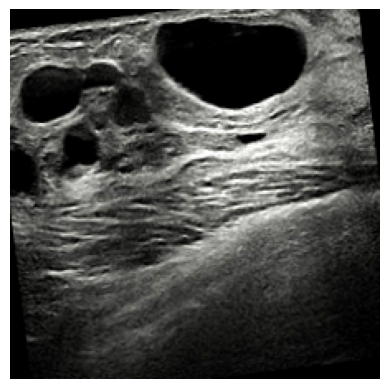

Displaying an ultrasound image from the 'malignant' folder:


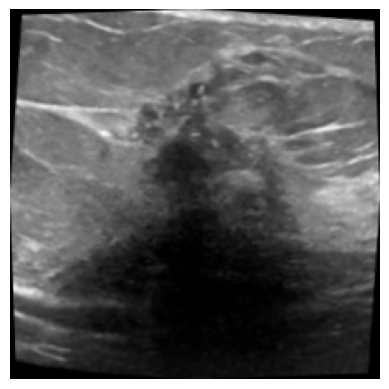

In [32]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_ultrasound_image_from_folder(folder_path):
    try:
        
        file_list = os.listdir(folder_path)

   
        image_file = next((file for file in file_list if file.lower().endswith('.png')), None)

        if image_file is not None:
            image_path = os.path.join(folder_path, image_file)
            img = mpimg.imread(image_path)
            plt.imshow(img, cmap='gray')
            plt.axis('off')  
            plt.show()
        else:
            print("No image files (JPG format) found in the folder.")
    except Exception as e:
        print("Error:", e)

if __name__ == "__main__":
    benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
    malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

    print("Displaying an ultrasound image from the 'benign' folder:")
    display_ultrasound_image_from_folder(benign_folder)

    print("Displaying an ultrasound image from the 'malignant' folder:")
    display_ultrasound_image_from_folder(malignant_folder)

**1.Validity:**

    - To check the validity of data(PNG), it needs to go through several steps, the following will take care of 
      datas' validity

- Simply we can check how many data are labaled in each category of 'bening' and 'malignant'.


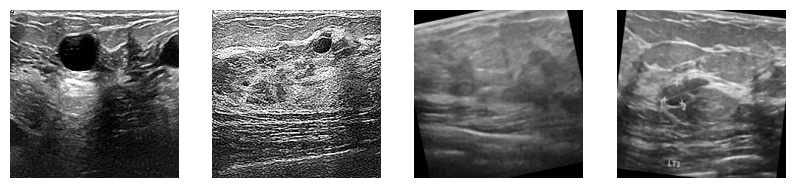

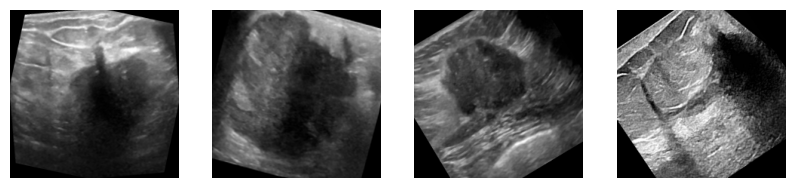

In [34]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_sample_images(folder_path, num_samples=4, random_seed=None):
    image_files = os.listdir(folder_path)
    random.seed(random_seed)
    selected_files = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(10, 6))
    for i, file in enumerate(selected_files):
        plt.subplot(1, num_samples, i+1)
        img = mpimg.imread(os.path.join(folder_path, file))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

display_sample_images(benign_folder, num_samples=4, random_seed=42)
display_sample_images(malignant_folder, num_samples=4, random_seed=42)


- To check the different sizes of the image in the dataframe in teh train set it can check that by following steps.

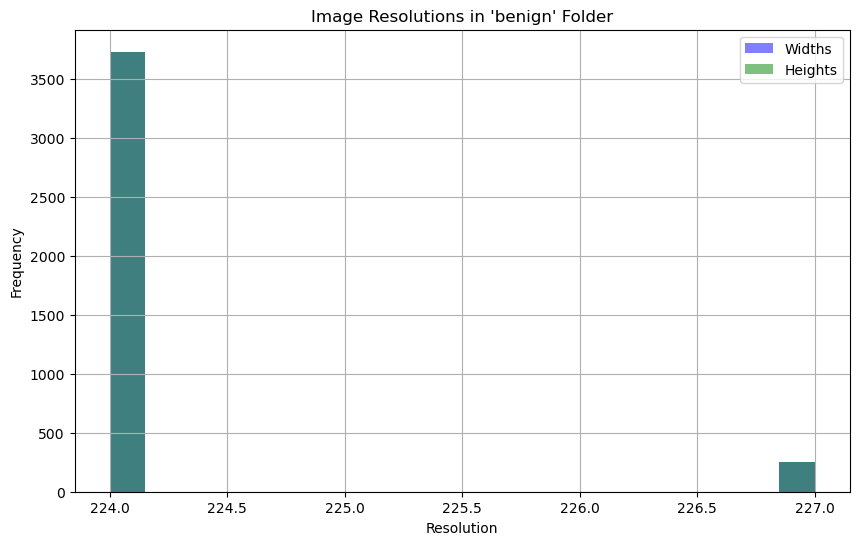

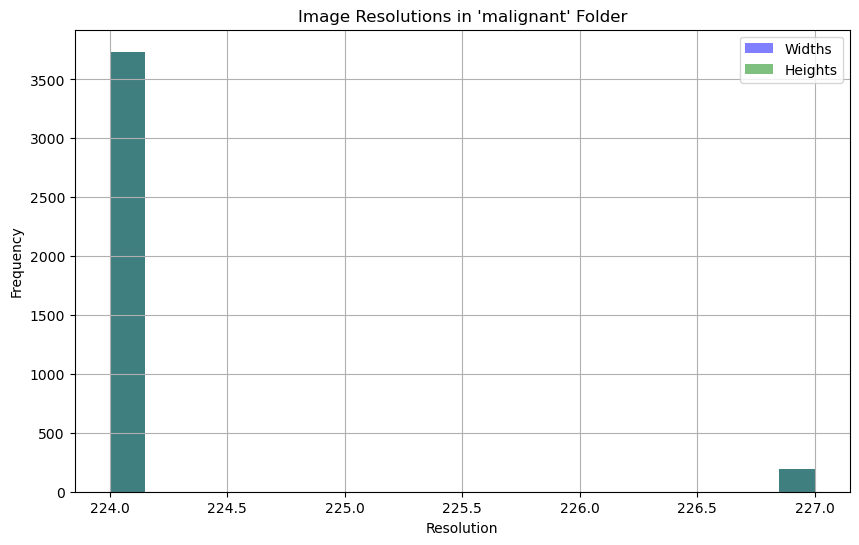

In [35]:
import os
from PIL import Image
import matplotlib.pyplot as plt

benign_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign'
malignant_folder = '/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant'

def get_image_sizes_in_folder(folder_path):
    widths = []
    heights = []
    
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)
        try:
            img = Image.open(image_path)
            width, height = img.size
            widths.append(width)
            heights.append(height)
        except Exception as e:
            print(f"Error processing '{image_path}': {e}")
    
    return widths, heights

benign_widths, benign_heights = get_image_sizes_in_folder(benign_folder)

malignant_widths, malignant_heights = get_image_sizes_in_folder(malignant_folder)

plt.figure(figsize=(10, 6))
plt.hist(benign_widths, bins=20, alpha=0.5, color='blue', label='Widths')
plt.hist(benign_heights, bins=20, alpha=0.5, color='green', label='Heights')
plt.xlabel("Resolution")
plt.ylabel("Frequency")
plt.title("Image Resolutions in 'benign' Folder")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(malignant_widths, bins=20, alpha=0.5, color='blue', label='Widths')
plt.hist(malignant_heights, bins=20, alpha=0.5, color='green', label='Heights')
plt.xlabel("Resolution")
plt.ylabel("Frequency")
plt.title("Image Resolutions in 'malignant' Folder")
plt.legend()
plt.grid(True)
plt.show()


- Resizing the data:

In [37]:
from PIL import Image
import os

desired_width = 300
desired_height = 200

def resize_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/benign"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_benign/"
resize_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_malignant/"
resize_images(input_malignant_directory, output_malignant_directory)

/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_4460/1273651100.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


- Checking the radomness of data:

Random sample from the 'benign' class:


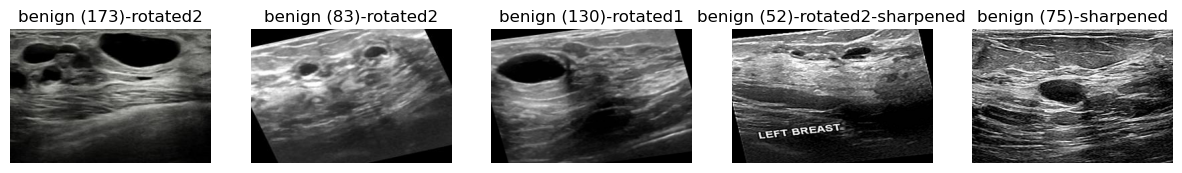


Random sample from the 'malignant' class:


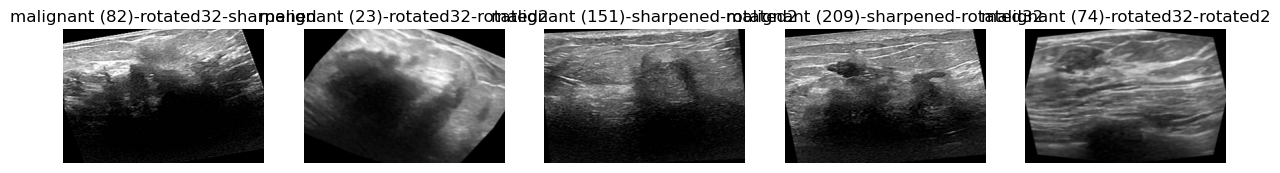

In [38]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_random_sample(folder_path, num_samples=5):
    image_files = os.listdir(folder_path)
    random_samples = random.sample(image_files, num_samples)
    
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random_samples):
        image_path = os.path.join(folder_path, filename)
        image = mpimg.imread(image_path)
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.title(filename.split('.')[0])
        plt.axis('off')
    
    plt.show()

resized_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_benign/"
resized_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_malignant/"

num_samples_to_display = 5
print("Random sample from the 'benign' class:")
display_random_sample(resized_benign_directory, num_samples_to_display)

print("\nRandom sample from the 'malignant' class:")
display_random_sample(resized_malignant_directory, num_samples_to_display)

**Augmenting the Data:**

In [41]:
from PIL import Image, ImageOps
import os

desired_width = 300
desired_height = 200

def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            input_path = os.path.join(input_dir, filename)
            output_path = os.path.join(output_dir, filename)

            image = Image.open(input_path)

            resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)

            resized_image.save(output_path)

            for angle in [90, 180, 270]:  
                rotated_image = resized_image.rotate(angle)
                rotated_output_path = os.path.join(output_dir, f"rotated_{angle}_{filename}")
                rotated_image.save(rotated_output_path)

            flipped_image = ImageOps.flip(resized_image)  
            flipped_output_path = os.path.join(output_dir, f"flipped_{filename}")
            flipped_image.save(flipped_output_path)

input_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_benign/"
output_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_benign/"
augment_images(input_benign_directory, output_benign_directory)

input_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/resized_malignant/"
output_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_malignant/"
augment_images(input_malignant_directory, output_malignant_directory)


/var/folders/f6/pqrp7l4d7qb79_yxqsqcx7vw0000gn/T/ipykernel_4460/2123612379.py:18: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize((desired_width, desired_height), Image.ANTIALIAS)


In [42]:
import os

def count_images_in_folder(folder_path):
    num_images = len([filename for filename in os.listdir(folder_path) if filename.endswith(".jpg") or filename.endswith(".png")])
    return num_images

augmented_benign_directory =    "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_benign/"
agumented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_malignant/"
num_benign_images = count_images_in_folder(augmented_benign_directory)
num_malignant_images = count_images_in_folder(agumented_malignant_directory)

print(f"Number of images in the 'benign' class: {num_benign_images}")
print(f"Number of images in the 'malignant' class: {num_malignant_images}")

Number of images in the 'benign' class: 22340
Number of images in the 'malignant' class: 19635


**Normalize the Data**

In [62]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_malignant/"

def normalize_image(img):
    img = img.astype('float32')
    img /= 255.0  
    return img

def load_and_normalize_images(directory):
    image_list = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = load_img(img_path, target_size=(224, 224)) 
        img_array = img_to_array(img)
        normalized_img = normalize_image(img_array)
        image_list.append(normalized_img)
    return np.array(image_list)

augmented_benign_normalized = load_and_normalize_images(augmented_benign_directory)
augmented_malignant_normalized = load_and_normalize_images(augmented_malignant_directory)





---

**Denoising the Data**

-  ultrasound images have some noises, to get better accuracy and results with our model it would recommended to denoised the data

In [26]:
import os
import cv2
import numpy as np

augmented_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_benign/"
augmented_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/augmented_malignant/"


def apply_gaussian_blur(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

def apply_median_filter(image):
    median_filtered = cv2.medianBlur(image, 5)
    return median_filtered

def process_images_with_noise_reduction(directory, output_directory, noise_reduction_func):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        image = cv2.imread(img_path)
        
        denoised_image = noise_reduction_func(image)
        
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, denoised_image)

process_images_with_noise_reduction(augmented_benign_directory, "denoised_benign", apply_gaussian_blur)

process_images_with_noise_reduction(augmented_malignant_directory, "denoised_malignant", apply_median_filter)


---
**Balancing the Data**

- Class of images is equally represented, promoting fairness and can help to help machine to work properly.

In [17]:
import os
import shutil

denoised_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/denoised_benign/"
denoised_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/denoised_malignant/"

balanced_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced_benign/"
balanced_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced_malignant/"

if not os.path.exists(balanced_benign_directory):
    os.makedirs(balanced_benign_directory)

if not os.path.exists(balanced_malignant_directory):
    os.makedirs(balanced_malignant_directory)

num_benign_images = len(os.listdir(denoised_benign_directory))
num_malignant_images = len(os.listdir(denoised_malignant_directory))

oversampling_ratio = num_malignant_images // num_benign_images

for filename in os.listdir(denoised_benign_directory):
    src_path = os.path.join(denoised_benign_directory, filename)
    dst_path = os.path.join(balanced_benign_directory, filename)
    shutil.copy(src_path, dst_path)

for filename in os.listdir(denoised_malignant_directory):
    src_path = os.path.join(denoised_malignant_directory, filename)
    dst_path = os.path.join(balanced_malignant_directory, filename)
    shutil.copy(src_path, dst_path)

___
**Convert to NumPy arrays**

- To simplifies and streamlines the data processing and integration steps within machine learning workflows we nned to convert to NumPy arrays.

In [1]:
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array, array_to_img
import os

balanced_benign_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced/balanced_benign/"
balanced_malignant_directory = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced/balanced_malignant/"

# Function to process images in a directory
def process_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming the images are in JPG format
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            
            # Print image details
            print("Image details:")
            print("Type:", type(img))
            print("Format:", img.format)
            print("Mode:", img.mode)
            print("Size:", img.size)
            
            # Convert the given image into a numpy array
            img_numpy_array = img_to_array(img)
            print("\nImage is converted to a NumPy array:")
            print("Type:", type(img_numpy_array))
            print("dtype:", img_numpy_array.dtype)
            print("shape:", img_numpy_array.shape)
            
            # Convert back to image
            img_pil_from_numpy_array = array_to_img(img_numpy_array)
            print("\nConverting NumPy array back to image:")
            print("Type:", type(img_pil_from_numpy_array))
            

# Process images in the balanced benign directory
print("Processing images in balanced benign directory:")
process_images(balanced_benign_directory)

# Process images in the balanced malignant directory
print("Processing images in balanced malignant directory:")
process_images(balanced_malignant_directory)


2023-09-04 12:28:25.467221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Processing images in balanced benign directory:
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image 

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
S


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num

Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'num


Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL.Image.Image'>
Image details:
Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Format: JPEG
Mode: RGB
Size: (300, 200)

Image is converted to a NumPy array:
Type: <class 'numpy.ndarray'>
dtype: float32
shape: (200, 300, 3)

Converting NumPy array back to image:
Type: <class 'PIL

In [30]:
path_train_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced"
data_train_eda_dir = pathlib.Path(path_train_eda)

- Defining varaibles:

In [31]:
x_train_dir = os.path.join(data_train_eda_dir, 'train')
y_train_dir = os.path.join(data_train_eda_dir, 'trainannot')


# Conclusion 

The train set after after applying several steps such as balancing or resizng is modified and cleaned. The train varaibles also for the modeling is already defined and ready for the modeling step.